# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#!pip install citipy

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#x=cities[0]
#cityweather=requests.get(f'http://api.openweathermap.org/data/2.5/weather?q={x}&appid={weather_api_key}').json()
#pprint(cityweather)

In [4]:
baseurl= 'http://api.openweathermap.org/data/2.5/weather?q='
key='&appid='+weather_api_key

realCities,fakeCities=[],[]
maxtemps,hums,clouds,winds,countries,dts = [],[],[],[],[],[]
lats,lngs, hemi =[],[],[]

for city in cities: 
    url = baseurl + city + key
    weatherDict = requests.get(url).json()
    if 'coord' in weatherDict:
        K=float(weatherDict['main']['temp_max'])
        F = ((K + (-273.15)) * (9/5)) + 32
        maxtemps.append(F)
        hums.append(weatherDict['main']['humidity'])
        clouds.append(weatherDict['clouds']['all'])
        winds.append(weatherDict['wind']['speed'])
        lats.append(weatherDict['coord']['lat'])
        lngs.append(weatherDict['coord']['lon'])
        countries.append(weatherDict['sys']['country'])
        dts.append(weatherDict['dt'])
        
        if weatherDict['coord']['lat'] > 0:
            hemi.append('north')
        else:
            hemi.append('south')
        
        realCities.append(city)
        
        y=len(realCities)
        print(f'Successfully retrieved data for city {y}: {city}')
    else:
        fakeCities.append(city)

print('\n\n\nData retrieval complete.')

cityDF = pd.DataFrame({
    'City':realCities,
    'Latitude':lats,
    'Longitude':lngs,
    'Maximum Temperature':maxtemps,
    'Humidity':hums,
    'Cloud Cover':clouds,
    'Wind Speed':winds,
    'Country':countries,
    'Datetime':dts,
    'Hemisphere':hemi
})


Successfully retrieved data for city 1: talara
Successfully retrieved data for city 2: san patricio
Successfully retrieved data for city 3: puerto ayora
Successfully retrieved data for city 4: mataura
Successfully retrieved data for city 5: cabo san lucas
Successfully retrieved data for city 6: arraial do cabo
Successfully retrieved data for city 7: qaqortoq
Successfully retrieved data for city 8: rikitea
Successfully retrieved data for city 9: bluff
Successfully retrieved data for city 10: bhadra
Successfully retrieved data for city 11: basqal
Successfully retrieved data for city 12: mangai
Successfully retrieved data for city 13: khatanga
Successfully retrieved data for city 14: ushuaia
Successfully retrieved data for city 15: saint-leu
Successfully retrieved data for city 16: narsaq
Successfully retrieved data for city 17: sao filipe
Successfully retrieved data for city 18: norman wells
Successfully retrieved data for city 19: chuy
Successfully retrieved data for city 20: labuhan
Su

Successfully retrieved data for city 165: noyabrsk
Successfully retrieved data for city 166: qarqin
Successfully retrieved data for city 167: mana
Successfully retrieved data for city 168: castro
Successfully retrieved data for city 169: saskylakh
Successfully retrieved data for city 170: faya
Successfully retrieved data for city 171: woodward
Successfully retrieved data for city 172: fort nelson
Successfully retrieved data for city 173: ascension
Successfully retrieved data for city 174: alice springs
Successfully retrieved data for city 175: yellowknife
Successfully retrieved data for city 176: yerbogachen
Successfully retrieved data for city 177: le port
Successfully retrieved data for city 178: cidreira
Successfully retrieved data for city 179: anadyr
Successfully retrieved data for city 180: georgetown
Successfully retrieved data for city 181: rawson
Successfully retrieved data for city 182: marsh harbour
Successfully retrieved data for city 183: lata
Successfully retrieved data f

Successfully retrieved data for city 327: malanje
Successfully retrieved data for city 328: hasaki
Successfully retrieved data for city 329: banda aceh
Successfully retrieved data for city 330: upernavik
Successfully retrieved data for city 331: suruc
Successfully retrieved data for city 332: acapulco
Successfully retrieved data for city 333: gejiu
Successfully retrieved data for city 334: carauari
Successfully retrieved data for city 335: beringovskiy
Successfully retrieved data for city 336: yining
Successfully retrieved data for city 337: naze
Successfully retrieved data for city 338: zhanaozen
Successfully retrieved data for city 339: zalegoshch
Successfully retrieved data for city 340: ostersund
Successfully retrieved data for city 341: kiunga
Successfully retrieved data for city 342: srivardhan
Successfully retrieved data for city 343: iskateley
Successfully retrieved data for city 344: haines junction
Successfully retrieved data for city 345: kahului
Successfully retrieved data 

Successfully retrieved data for city 487: moose jaw
Successfully retrieved data for city 488: okhotsk
Successfully retrieved data for city 489: kirando
Successfully retrieved data for city 490: viedma
Successfully retrieved data for city 491: mamakan
Successfully retrieved data for city 492: kasempa
Successfully retrieved data for city 493: sarkand
Successfully retrieved data for city 494: vilyuysk
Successfully retrieved data for city 495: provideniya
Successfully retrieved data for city 496: pombia
Successfully retrieved data for city 497: ushtobe
Successfully retrieved data for city 498: gornopravdinsk
Successfully retrieved data for city 499: lebu
Successfully retrieved data for city 500: sembakung
Successfully retrieved data for city 501: axim
Successfully retrieved data for city 502: sabzevar
Successfully retrieved data for city 503: port macquarie
Successfully retrieved data for city 504: takoradi
Successfully retrieved data for city 505: akim swedru
Successfully retrieved data f

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
cityDF.to_csv('cities.csv')

cityDF.head()

,City,Latitude,Longitude,Maximum Temperature,Humidity,Cloud Cover,Wind Speed,Country,Datetime,Hemisphere
0,talara,-4.5772,-81.2719,67.514,85,69,7.76,PE,1622592797,south
1,san patricio,28.0170,-97.5169,84.290,68,84,5.40,US,1622592797,north
2,puerto ayora,-0.7393,-90.3518,74.552,88,93,2.24,EC,1622592798,south
3,mataura,-46.1927,168.8643,49.478,94,100,1.31,NZ,1622592798,south
4,cabo san lucas,22.8909,-109.9124,95.612,14,40,4.12,MX,1622592594,north


In [6]:
cityDF.shape

(562, 10)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
cityDF['Humidity'].max()
# No cities over 100% humidity
# but random selection may change this later

100

In [8]:
# Make a new DataFrame after dropping all humidity outliers.
new_cityDF=cityDF[cityDF['Humidity']<=100]
new_cityDF.shape

(562, 10)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

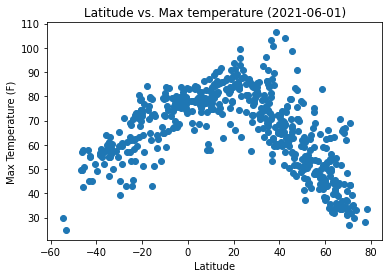

In [9]:
import datetime
today=datetime.date.today()

plt.scatter(new_cityDF['Latitude'],new_cityDF['Maximum Temperature'])
plt.title(f'Latitude vs. Max temperature ({today})')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.savefig('latVtemp')
plt.show()

## Latitude vs. Humidity Plot

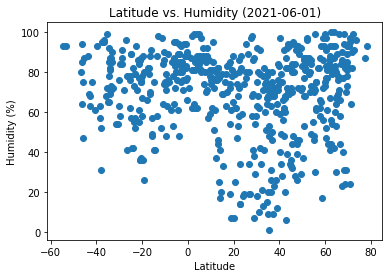

In [10]:
plt.scatter(new_cityDF['Latitude'],new_cityDF['Humidity'])
plt.title(f'Latitude vs. Humidity ({today})')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.savefig('latVhum')
plt.show()

## Latitude vs. Cloudiness Plot

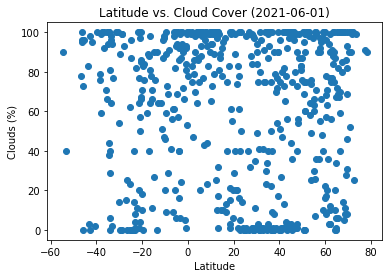

In [11]:
plt.scatter(new_cityDF['Latitude'],new_cityDF['Cloud Cover'])
plt.title(f'Latitude vs. Cloud Cover ({today})')
plt.ylabel('Clouds (%)')
plt.xlabel('Latitude')
plt.savefig('latVcloud')
plt.show()

## Latitude vs. Wind Speed Plot

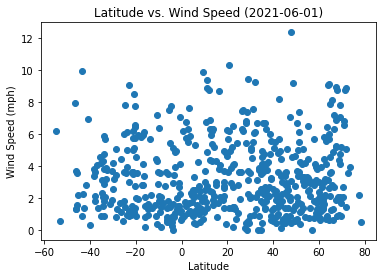

In [12]:
plt.scatter(new_cityDF['Latitude'],new_cityDF['Wind Speed'])
plt.title(f'Latitude vs. Wind Speed ({today})')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.savefig('latVwind')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

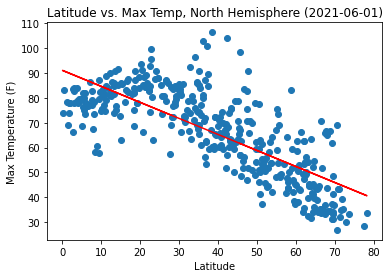

Line Equation: y = -0.6 x + 91.1
The r2 value is 0.5840


In [13]:
northDF = new_cityDF[new_cityDF['Hemisphere'] == 'north']
southDF = new_cityDF[new_cityDF['Hemisphere'] == 'south']

from scipy.stats import linregress
import numpy as np

x = northDF['Latitude']
y = northDF['Maximum Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = (x * slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.title(f'Latitude vs. Max Temp, North Hemisphere ({today})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('latVtemp_N_linreg')
plt.show()

print(f'Line Equation: y = {slope:.1f} x + {intercept:.1f}')
print(f'The r2 value is {rvalue **2:.4f}')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

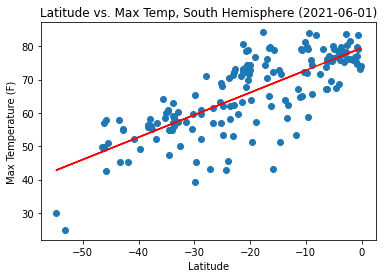

Line Equation: y = 0.7 x + 79.5
The r2 value is 0.5957


In [14]:
x = southDF['Latitude']
y = southDF['Maximum Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = (x * slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.title(f'Latitude vs. Max Temp, South Hemisphere ({today})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('latVtemp_S_linreg')
plt.show()

print(f'Line Equation: y = {slope:.1f} x + {intercept:.1f}')
print(f'The r2 value is {rvalue **2:.4f}')


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

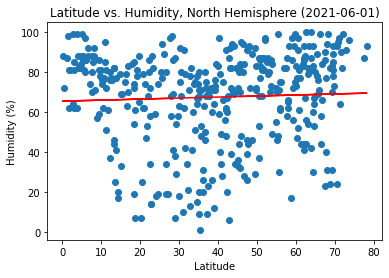

Line Equation: y = 0.1 x + 65.5
The r2 value is 0.0021


In [15]:
x = northDF['Latitude']
y = northDF['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = (x * slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.title(f'Latitude vs. Humidity, North Hemisphere ({today})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('latVhum_N_linreg')
plt.show()

print(f'Line Equation: y = {slope:.1f} x + {intercept:.1f}')
print(f'The r2 value is {rvalue **2:.4f}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

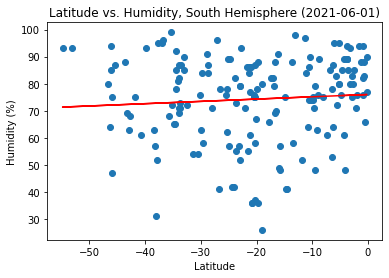

Line Equation: y = 0.1 x + 76.0
The r2 value is 0.0052


In [16]:
x = southDF['Latitude']
y = southDF['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = (x * slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.title(f'Latitude vs. Humidity, South Hemisphere ({today})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('latVhum_S_linreg')
plt.show()

print(f'Line Equation: y = {slope:.1f} x + {intercept:.1f}')
print(f'The r2 value is {rvalue **2:.4f}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

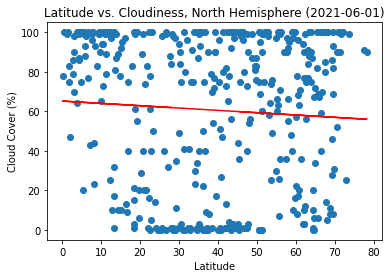

Line Equation: y = -0.1 x + 65.2
The r2 value is 0.0040


In [17]:
x = northDF['Latitude']
y = northDF['Cloud Cover']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = (x * slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.title(f'Latitude vs. Cloudiness, North Hemisphere ({today})')
plt.xlabel('Latitude')
plt.ylabel('Cloud Cover (%)')
plt.savefig('latVcloud_N_linreg')
plt.show()

print(f'Line Equation: y = {slope:.1f} x + {intercept:.1f}')
print(f'The r2 value is {rvalue **2:.4f}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

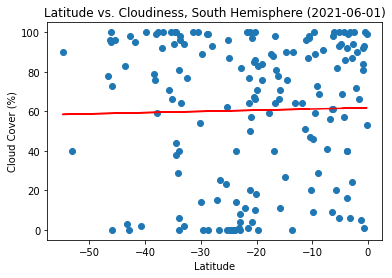

Line Equation: y = 0.1 x + 61.8
The r2 value is 0.0005


In [18]:
x = southDF['Latitude']
y = southDF['Cloud Cover']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = (x * slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.title(f'Latitude vs. Cloudiness, South Hemisphere ({today})')
plt.xlabel('Latitude')
plt.ylabel('Cloud Cover (%)')
plt.savefig('latVcloud_S_linreg')
plt.show()

print(f'Line Equation: y = {slope:.1f} x + {intercept:.1f}')
print(f'The r2 value is {rvalue **2:.4f}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

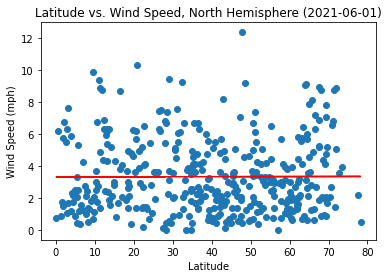

Line Equation: y = 0.0 x + 3.3
The r2 value is 0.0000


In [19]:
x = northDF['Latitude']
y = northDF['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = (x * slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.title(f'Latitude vs. Wind Speed, North Hemisphere ({today})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('latVwind_N_linreg')
plt.show()

print(f'Line Equation: y = {slope:.1f} x + {intercept:.1f}')
print(f'The r2 value is {rvalue **2:.4f}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

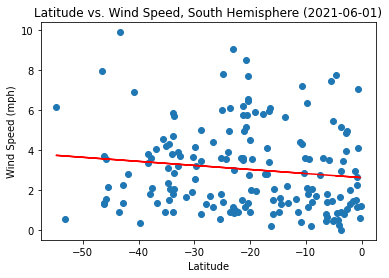

Line Equation: y = -0.0 x + 2.6
The r2 value is 0.0168


In [20]:
x = southDF['Latitude']
y = southDF['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = (x * slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.title(f'Latitude vs. Wind Speed, South Hemisphere ({today})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('latVwind_S_linreg')
plt.show()

print(f'Line Equation: y = {slope:.1f} x + {intercept:.1f}')
print(f'The r2 value is {rvalue **2:.4f}')

In [21]:
print('''
-------------------------
------- ANALYSIS --------
-------------------------

There is a clear and strong correlation between temperature and latitude. 
The temperature tends to be higher closer to the equator, and get lower the further you get from the equator. 
The r2 values are above 0.7 or even 0.8 showing a very strong correlation.
This is entirely as expected, considering what we know about temperature across the world.

The other factors are less stong. The r2 values are extremely low, meaning any noticeable slope is more like coincidence. 

The only factor that shows some consistency is Humidity. The slopes are mirrored around the equator, similar to temperature, which suggests a more purposeful correlation. However the r2 values are still barely relevant.
''')


-------------------------
------- ANALYSIS --------
-------------------------

There is a clear and strong correlation between temperature and latitude. 
The temperature tends to be higher closer to the equator, and get lower the further you get from the equator. 
The r2 values are above 0.7 or even 0.8 showing a very strong correlation.
This is entirely as expected, considering what we know about temperature across the world.

The other factors are less stong. The r2 values are extremely low, meaning any noticeable slope is more like coincidence. 

The only factor that shows some consistency is Humidity. The slopes are mirrored around the equator, similar to temperature, which suggests a more purposeful correlation. However the r2 values are still barely relevant.

